# Neural Network from Scratch Performance Analysis

Quick analysis of a neural network I programmed with basic functions and numpy vs a state of the art tensorflow implementation. Both models will use sigmoid functions and have 2 hidden layers with 30 neurons each and be trained on the MNIST database


In [1]:
import numpy as np
import pandas as pd
from network import Network
from tensorflow import keras
import tensorflow as tf
import mnist, matplotlib, os, time, seaborn
%matplotlib inline

#Disable GPU tensorflow
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#Load data
x_train, t_train, x_test, t_test = mnist.load()
#one_hot_encode labels
y_train = np.zeros((60000, 10))
y_test = np.zeros((10000, 10))
for i in range(60000):
    y_train[i, t_train[i]] = 1
for i in range(10000):
    y_test[i, t_test[i]] = 1
#normalize images
x_train = x_train / 255
x_test = x_test / 255

epochs = 15
activation_function = 'sigmoid'
alpha = .5

## 1 Import packages and load data. 


In [3]:
test_network = Network()
test_network.set_input(784)
test_network.set_output(10)
test_network.add_hidden_layers(1, 30, activation_function)
test_network.add_hidden_layers(1, 15, activation_function)
test_network.set_output_activation_function(activation_function)
test_network.set_error_function('mean squared error')
test_network.set_gradient_descent_algorithm('stochastic')
test_network.set_alpha(alpha)
test_network.compile_network()
start_time = time.time()
test_network.train(x_train, y_train, x_test, y_test, epochs)
custom_network_time = time.time() - start_time

Epoch: 1. Accuracy: 89.07000000000001%
Epoch: 2. Accuracy: 91.36%
Epoch: 3. Accuracy: 91.44%
Epoch: 4. Accuracy: 91.83%
Epoch: 5. Accuracy: 92.17999999999999%
Epoch: 6. Accuracy: 93.67%
Epoch: 7. Accuracy: 93.58999999999999%
Epoch: 8. Accuracy: 93.32000000000001%
Epoch: 9. Accuracy: 93.51%
Epoch: 10. Accuracy: 93.87%
Epoch: 11. Accuracy: 93.89999999999999%
Epoch: 12. Accuracy: 94.21000000000001%
Epoch: 13. Accuracy: 93.67999999999999%
Epoch: 14. Accuracy: 94.24%
Epoch: 15. Accuracy: 93.61%


## 2 Create and test custom network

In [2]:
model = keras.Sequential([
        keras.layers.Dense(30, activation = activation_function, input_shape = (784,), kernel_initializer=keras.initializers.RandomNormal(mean = 0, stddev = 1)),
        keras.layers.Dense(15, activation = activation_function, kernel_initializer=keras.initializers.RandomNormal(mean = 0, stddev = 1)),
        keras.layers.Dense(10, activation = activation_function, kernel_initializer=keras.initializers.RandomNormal(mean = 0, stddev = 1))
    ])
model.compile(optimizer = keras.optimizers.SGD(learning_rate = alpha), loss = keras.losses.mean_squared_error, metrics =  [keras.metrics.categorical_accuracy])
start_time = time.time()
history = model.fit(x_train, y_train, batch_size = 1, epochs = epochs, validation_data = (x_test, y_test), verbose = 0)
keras_time = time.time() - start_time

## 3 Create and test Keras network

Custom network training time: 257.23 
Keras training time: 371.74


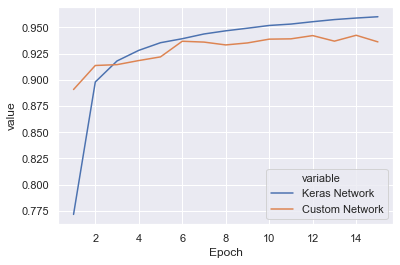

In [4]:
data = pd.DataFrame({"Epoch":range(1, epochs+1), "Custom Network":test_network.history, "Keras Network":history.history['categorical_accuracy']})
data = data.melt(id_vars = 'Epoch', value_vars = ['Keras Network', 'Custom Network'])
seaborn.set()
plot = seaborn.lineplot(x = 'Epoch', y = 'value', hue = 'variable', data = data)
print(f'Custom network training time: {custom_network_time:.2f} \nKeras training time: {keras_time:.2f}')



## 4 Graph data and analyze results
While this graph only shows one trial, I ran a few more just to validate the results and the graphs came up very similar. While my network started with a higher accuracy, it gained less accuracy and also regressed as the training went on in comparison to the Keras network which had a much smoother curve. I am relatively confident that both neural networks were initalized the same way (random normal weight distribution, same activations, etc.) so this difference can be attributed to either optimizations done by Tensorflow or flaws in my code. 